<a href="https://colab.research.google.com/github/jnctproject/pytorch-tutorial/blob/main/introduction_to_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import torch

In [30]:
num=[[1,2,3,4],[5,6,7,8]]
num

[[1, 2, 3, 4], [5, 6, 7, 8]]

In [31]:
import numpy as np
np1=np.random.rand(2,3,4)
print(np1)
np1.dtype


[[[0.38235685 0.0378906  0.12112253 0.64164205]
  [0.04188866 0.63479285 0.64190664 0.68372172]
  [0.87459291 0.85147943 0.1576104  0.67126068]]

 [[0.80348232 0.76769941 0.56464564 0.31642328]
  [0.56981202 0.17765476 0.1600226  0.43508711]
  [0.55369997 0.44495109 0.51351489 0.23416708]]]


dtype('float64')

In [32]:
tensor_2d=torch.rand(2,3,4)
tensor_2d

tensor([[[0.7234, 0.2406, 0.4093, 0.9738],
         [0.2052, 0.7404, 0.8668, 0.7421],
         [0.1588, 0.6535, 0.0484, 0.2422]],

        [[0.2096, 0.8402, 0.6172, 0.9814],
         [0.8236, 0.3483, 0.9824, 0.1669],
         [0.3462, 0.3699, 0.6995, 0.2854]]])

In [33]:
tensor1=torch.tensor(np1)
tensor1

tensor([[[0.3824, 0.0379, 0.1211, 0.6416],
         [0.0419, 0.6348, 0.6419, 0.6837],
         [0.8746, 0.8515, 0.1576, 0.6713]],

        [[0.8035, 0.7677, 0.5646, 0.3164],
         [0.5698, 0.1777, 0.1600, 0.4351],
         [0.5537, 0.4450, 0.5135, 0.2342]]], dtype=torch.float64)

In [34]:
import torch

In [35]:
tn1=torch.tensor([1,2,3,4,5])
tn2=torch.tensor([6,7,8,9,10])
print(tn1+tn2)

tensor([ 7,  9, 11, 13, 15])


In [36]:
torch.add(tn1,tn2)

tensor([ 7,  9, 11, 13, 15])

In [37]:
torch.add(tn1,tn2)
torch.sub(tn1,tn2)
torch.mul(tn1,tn2)
torch.div(tn1,tn2)
torch.pow(tn1,tn2)
torch.remainder(tn2,tn1)
print(tn1)
tn1.add(tn2)
print(tn1)
tn2
tn1.add(tn2)
tn2
tn1

tensor([1, 2, 3, 4, 5])
tensor([1, 2, 3, 4, 5])


tensor([1, 2, 3, 4, 5])

In [38]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [39]:
# create a class the inherites nn.module
class Model(nn.Module):
  def __init__(self, in_features=4, h1=8,h2=9, out_features=3):
    super().__init__()
    self.fc1=nn.Linear(in_features,h1)
    self.fc2=nn.Linear(h1,h2)
    self.out=nn.Linear(h2, out_features)


  def forward(self,x):
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.out(x)
    return x


In [40]:
torch.manual_seed(41)
model=Model()

In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [42]:
url='iris.data'
column=['sepal.length', 'sepal.width', 'petal.length', 'petal.width', 'variety']
data = pd.read_csv(url,names=column)
data['variety']=data['variety'].replace('Iris-setosa',0.0)
data['variety']=data['variety'].replace('Iris-versicolor',1.0)
data['variety']=data['variety'].replace('Iris-virginica',2.0)


<ipython-input-42-0fe729fc4895>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['variety']=data['variety'].replace('Iris-virginica',2.0)


In [43]:
X=data.drop('variety',axis=1)
y=data['variety']
X=X.values
y=y.values

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=41)

In [46]:
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [47]:
criterion =nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(), lr=0.01)



In [59]:
epochs=100
losses=[]
for i in range(epochs):
  y_pred=model.forward(X_train)

  loss=criterion(y_pred,y_train)

  losses.append(loss.detach().numpy())

  if i%10 == 0:
    print(f'Epoch:{i}and loss:{loss}')

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()




Epoch:0and loss:0.0001655045780353248
Epoch:10and loss:0.00016305370081681758
Epoch:20and loss:0.00016064310329966247
Epoch:30and loss:0.00015828559116926044
Epoch:40and loss:0.00015597730816807598
Epoch:50and loss:0.00015370038454420865
Epoch:60and loss:0.0001514825999038294
Epoch:70and loss:0.00014929918688721955
Epoch:80and loss:0.00014716401346959174
Epoch:90and loss:0.0001450602721888572


Text(0.5, 0, 'Epochs')

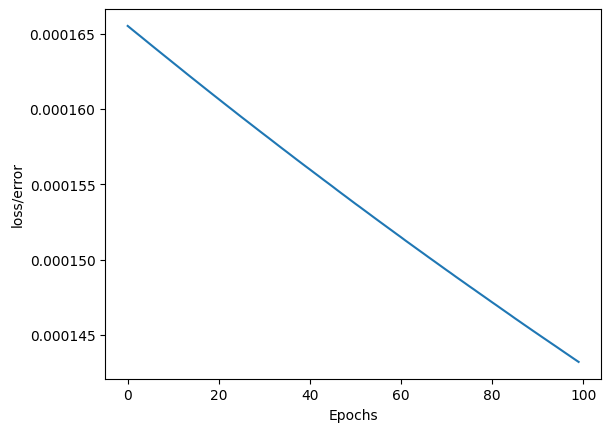

In [61]:
plt.plot(range(epochs),losses)
plt.ylabel("loss/error")
plt.xlabel('Epochs')